In [ ]:
library(tidymodels)
library(readxl)
library(lubridate)



car_data <- read_xlsx("Data Viz Assignment_ Carbitrage Data.xlsx")

`summarise()` has grouped output by 'make'. You can override using the
`.groups` argument.


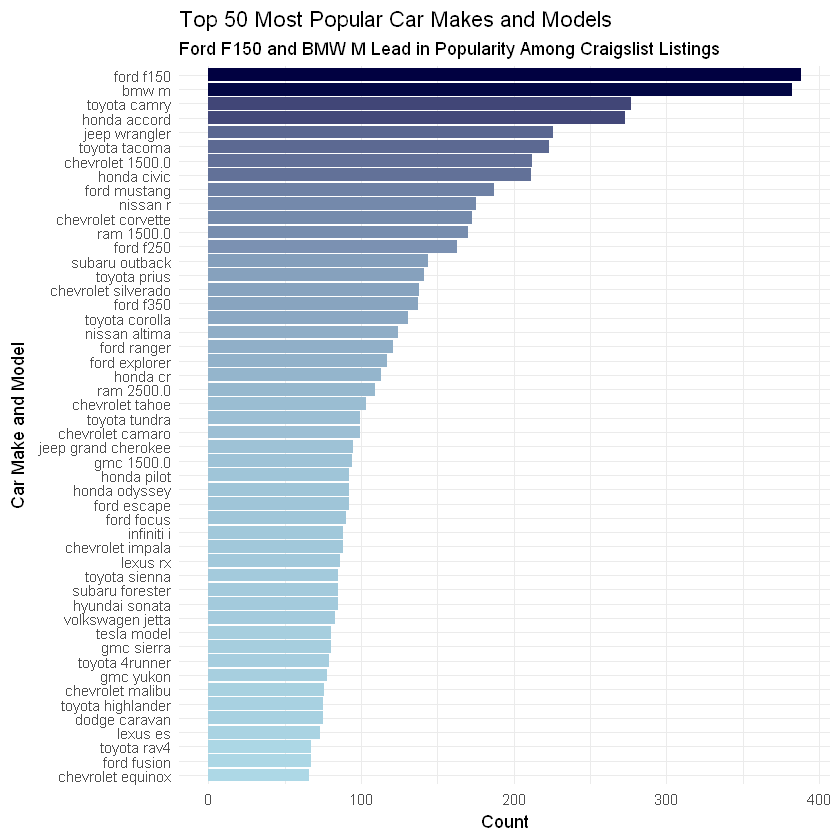

In [73]:
cleaned_data <- recipe(~., data = car_data) %>%
    step_naomit(all_predictors()) %>%
    prep() %>%
    juice()


# First Visuzalizations
data_for_viz = cleaned_data %>%
    group_by(make, model) %>%
    summarise(count = n()) %>%
    arrange(desc(count))


top_car_counts <- head(data_for_viz, 50)

ggplot(data = top_car_counts, aes(y = reorder(paste(make, model), count), x = count, fill = count)) +
    geom_bar(stat = "identity") +
    scale_fill_gradient(low = "lightblue", high = "#010141") +
    theme_minimal() +
    labs(y = "Car Make and Model", x = "Count", title = "Top 50 Most Popular Car Makes and Models", subtitle = "Ford F150 and BMW M Lead in Popularity Among Craigslist Listings") +
    theme(legend.position = "none")


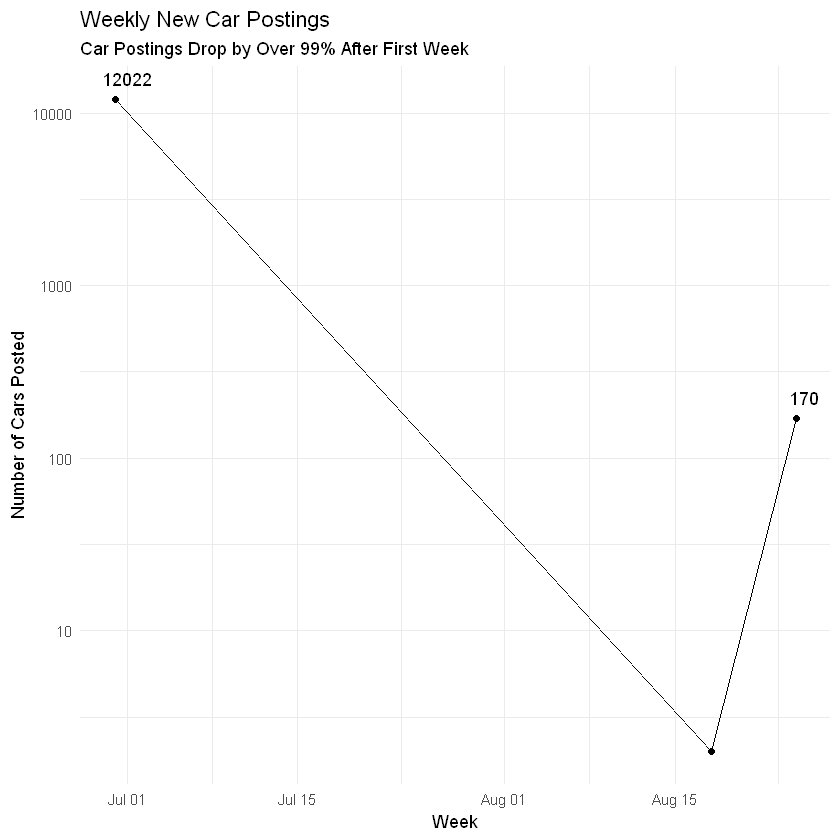

In [19]:

cleaned_data2 <- cleaned_data

cleaned_data2$time_posted <- as.Date(cleaned_data$time_posted)



# daily_plot <- cleaned_data2 %>%
#     group_by(time_posted) %>%
#     summarise(Count = n()) %>%
#     ggplot(aes(x = time_posted, y = Count)) +
#     geom_line() +
#     theme_minimal() +
#     labs(x = "Date", y = "Frequency", title = "Postings Per Day") +
#     geom_text(aes(label = ifelse(time_posted == as.Date("2024-07-03"), Count, "")), vjust = -1, hjust = 1) +
#     geom_point(aes(x = time_posted, y = Count))

# daily_plot

weekly_data <- cleaned_data2 %>%
    mutate(week = floor_date(time_posted, unit = "week")) %>% # Create a new 'week' column by rounding dates to the start of the week
    group_by(week) %>%
    summarise(Count = n())

ggplot(data = weekly_data, aes(x = week, y = Count)) +
    geom_line() +
    scale_y_log10() +
    labs(title = "Weekly New Car Postings", x = "Week", y = "Number of Cars Posted", subtitle = "Car Postings Drop by Over 99% After First Week") +
    geom_text(aes(label = ifelse(week == as.Date("2024-06-30") | week == as.Date("2024-08-25"), Count, "")), vjust = -1, hjust = .25) +
    geom_point(aes(x = week, y = Count)) +
    theme_minimal()

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.


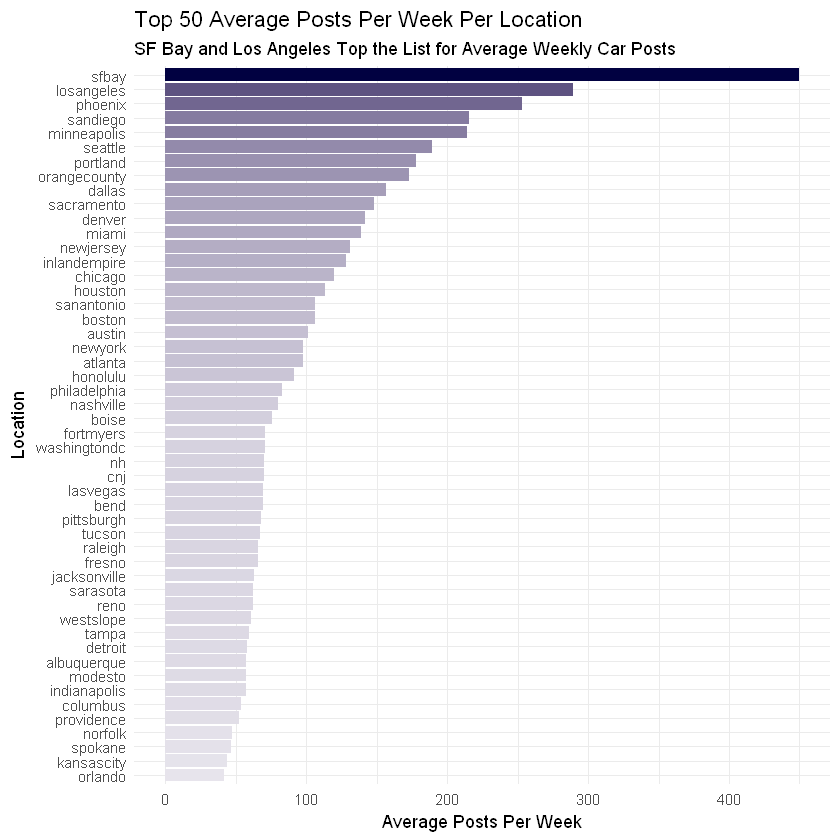

In [74]:
location_data = cleaned_data2 %>%
    mutate(week = floor_date(time_posted, unit = "week")) %>%
    group_by(location,week) %>%
    summarise(count = n())

location_data_50 = location_data %>%
    group_by(location) %>%
    summarise(avg = mean(count)) %>%
    arrange(desc(avg)) %>%
    head(50)



ggplot(data = location_data_50, aes(x = avg, y = reorder(location, avg), fill = avg)) +
    geom_bar(stat = "identity") +
    scale_fill_gradient2(low = "lightblue", high = "#010141") +
    theme_minimal() +
    theme(legend.position = "none") +
    labs(y = "Location", x = "Average Posts Per Week", title = "Top 50 Average Posts Per Week Per Location", subtitle = 'SF Bay and Los Angeles Top the List for Average Weekly Car Posts' )

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.


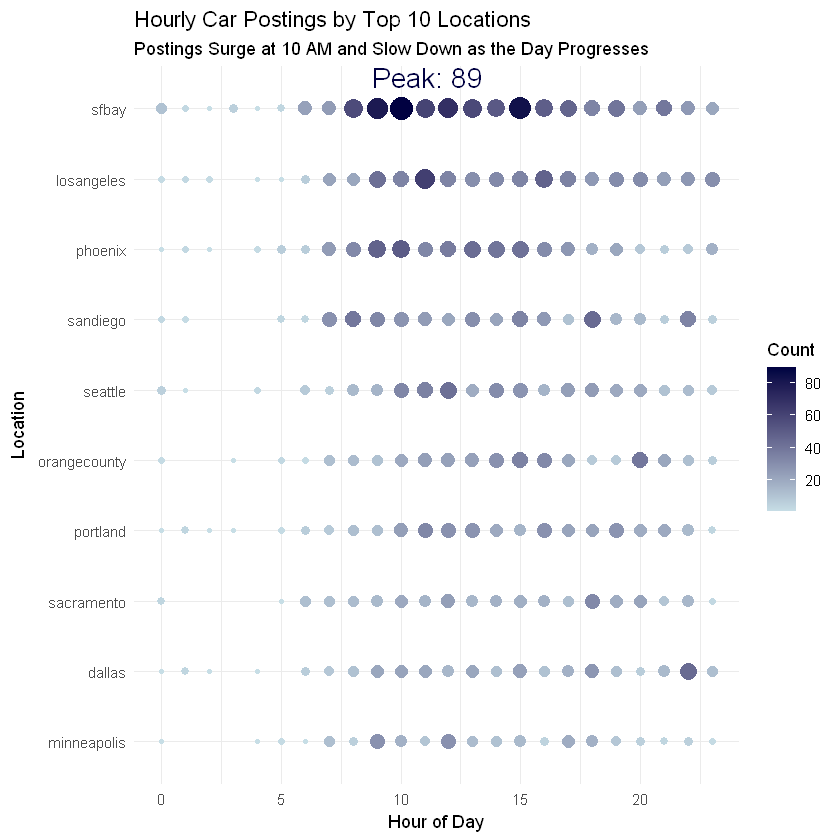

In [75]:
fourth_viz_data = cleaned_data

fourth_viz_data$time_posted = as.POSIXct(cleaned_data$time_posted, format = "%Y-%m-%d %H:%M:%S", tz = "UTC")

location_data_25 <- location_data %>%
    group_by(location) %>%
    summarise(avg = mean(count)) %>%
    arrange(desc(avg)) %>%
    head(10)


fourth_viz_data = fourth_viz_data %>%
    mutate(hour = hour(time_posted)) %>%
    filter(location %in% location_data_25$location)

fourth_viz_data = fourth_viz_data %>%
    group_by(location, hour) %>%
    summarise(count = n()) %>%
    arrange(desc(count)) %>%
    ungroup()


ggplot(data = fourth_viz_data, aes(y = reorder(location,count), x = hour, size = count, color = count)) +
    geom_point(alpha = 1, show.legend = FALSE) +
    scale_size_continuous(range = c(1, 6)) +
    scale_color_gradient(
        low = "#c7dee6", 
        high = "#010141") +
    labs(
        title = "Hourly Car Postings by Top 10 Locations",
        subtitle = "Postings Surge at 10 AM and Slow Down as the Day Progresses",
        x = "Hour of Day", y = "Location", size = NULL, color = "Count") +
    theme(
        axis.title.x = element_text(size = 14), 
        axis.text.y = element_text(size = 12), 
        axis.title.y = element_text(size = 14), 
        legend.position = "none") +
    geom_text(
        data = subset(fourth_viz_data, count == max(count)),
        aes(label = paste("Peak:", count)),
        vjust = -1, hjust = .25) +
    guides(size = 'none')+
    theme_minimal()




# ggplot(data = fourth_viz_data, aes(y = count, x = hour, group = location, color = location)) +
#     geom_line(linewidth = 1)+
#     theme_minimal()
